In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, LeaveOneOut,StratifiedKFold
import random
random.seed(1000)


In [17]:
!pip install cutecharts

In [18]:
# Chargement du jeu de données
palu=pd.read_excel('C:\\Users\\ASUS\\Documents\\these\\code_these-master\\palu_impute001.xlsx')
# Selection des features du paludisme
paluu=pd.DataFrame(palu, columns = [ 'TEMPERATURE','S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE'])

# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X = paluu
y = palu['Diagnostic']
X1_train, MX_test, y1_train, My_test = train_test_split(X, y, random_state=0)

#Suréchantillonnage avec l'algorithme SMOTE
#X1 = paluu
#y1 =palu['Diagnostic']
#y1= pd.DataFrame(y1)

In [19]:
palu

,Num_Patients,Num_JourVisite,A_annees,A_mois,A_semaines,A_jours,Sexe,TENSION_A 1,TENSION_A 2,PPOIDS,...,S_DABDO,S_VOMISS,S_NAUSEE,S_CEPHALE,S_FIEVRE,TDR,Diagnostic,Hosp,Ref,Deces
0,1,0,20,0,0,0,2,11,7,74,...,0,1,0,0,0,9,0,9,9,9
1,2,1,7,0,0,0,1,12,7,113,...,0,0,0,1,0,2,0,9,9,9
2,3,2,44,0,0,0,2,8,7,98,...,0,0,0,1,1,9,0,9,9,9
3,4,3,2,6,0,0,1,11,8,85,...,0,0,0,0,0,2,0,2,2,2
4,5,4,31,0,0,0,1,10,7,71,...,0,0,0,0,0,9,0,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21078,21079,38,60,0,0,0,1,18,9,92,...,0,0,0,0,0,9,0,9,NaN,NaN
21079,21080,38,0,1,15,0,2,9,9,91,...,0,0,0,0,0,9,0,9,NaN,NaN
21080,21081,38,26,0,0,0,1,10,12,1,...,0,0,0,1,0,9,0,9,NaN,NaN
21081,21082,38,35,0,0,0,1,10,1,111,...,0,0,0,0,0,9,0,9,NaN,NaN


(array([20469.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   614.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

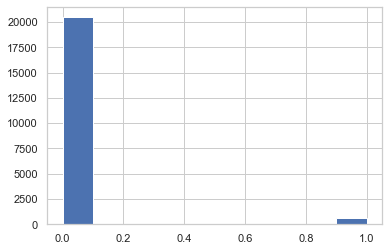

In [20]:
# Histogramme de la variable predictive diagnostic
plt.hist(y)

In [21]:
X1_train.shape

(15812, 13)

In [22]:
MX_test.shape

(5271, 13)

# Cross Validation

In [23]:
# Les differentes methodes pour faire une validation croisée(Cross Validation)
cv=KFold(5,random_state=0)
cv1= LeaveOneOut()
cv2=StratifiedKFold(10)  

# Dans la suite la méthode StratifiedKFold(10) est utilisée car elle permet de prendre en compte des données désiquilibrées.

# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Chercher les meilleurs paramètres du modele
param_grid={'max_depth': np.arange(14,20), 'criterion':['gini','entropy']}
grid=GridSearchCV( DecisionTreeClassifier(),param_grid, cv=cv2)
grid.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([14, 15, 16, 17, 18, 19])})

In [25]:
#Afficher le meilleur score
print('best score',grid.best_score_)
# Afficher les meilleurs parametres
print('best param',grid.best_params_)
# Recuperer le meilleur modele fourni 
model=grid.best_estimator_
print('best score',model.score(MX_test,My_test))

best score 0.9700227735970209
best param {'criterion': 'gini', 'max_depth': 16}
best score 0.9704040978941377


In [26]:
# Afficher la matrice de confusion
print(confusion_matrix(My_test, model.predict(MX_test)))  
# Afficher le rapport de la classification
print(classification_report(My_test,model.predict(MX_test)))

[[5107   13]
 [ 143    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5120
           1       0.38      0.05      0.09       151

    accuracy                           0.97      5271
   macro avg       0.68      0.53      0.54      5271
weighted avg       0.96      0.97      0.96      5271



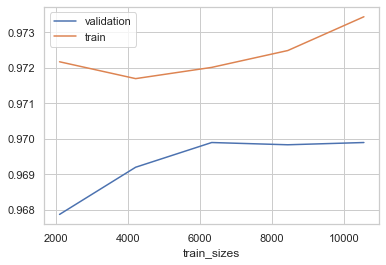

In [27]:
# Tracer les courbes d'apprentissages: Veci permet de verifier s'il y a surapprentissage ou apprentissage
N, train_score, val_score=learning_curve(model, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=3)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

0.7812111961920529


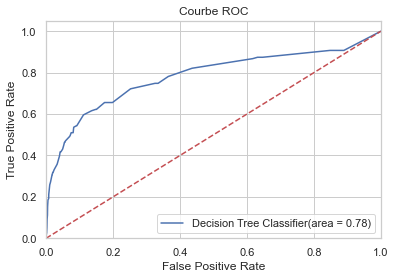

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model.predict_proba(MX_test)[:,1]
# Calculer l'air sous la courbe
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
# Tracer la courbe roc
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth': np.arange(14,20), 'criterion':['gini','entropy'],'n_estimators':[10,50,100, 200, 300,400]}
grid=GridSearchCV( RandomForestClassifier(),param_grid, cv=cv2)
grid.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([14, 15, 16, 17, 18, 19]),
                         'n_estimators': [10, 50, 100, 200, 300, 400]})

In [30]:
grid1=grid
print('best score',grid1.best_score_)
print('best score',grid1.best_params_)
model1=grid1.best_estimator_
print('best test score',model1.score(MX_test,My_test))

best score 0.9702125668994404
best score {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 10}
best test score 0.9713526845000948


In [31]:
N, train_score, val_score=learning_curve(model1, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

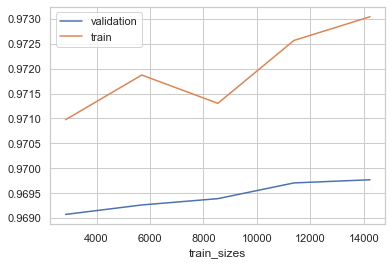

In [32]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [33]:
print(confusion_matrix(My_test, model1.predict(MX_test)))  
print(classification_report(My_test,model1.predict(MX_test)))

[[5107   13]
 [ 138   13]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       0.50      0.09      0.15       151

    accuracy                           0.97      5271
   macro avg       0.74      0.54      0.57      5271
weighted avg       0.96      0.97      0.96      5271



0.7951980287665561


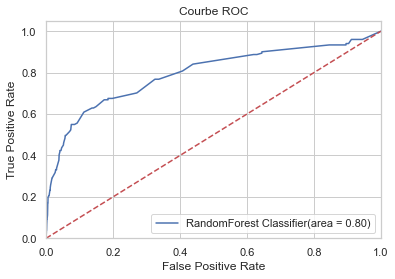

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model1.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
rf= LogisticRegression()

In [36]:
from sklearn.linear_model import LogisticRegression
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[50,100, 200, 300,400]}
grid2=GridSearchCV( LogisticRegression(),param_grid, cv=cv2)
grid2.fit(X1_train,y1_train)
print('best score',grid2.best_score_)
print('best score',grid2.best_params_)
model2=grid2.best_estimator_
print('best score',model2.score(MX_test,My_test))

best score 0.9706552846659646
best score {'max_iter': 50, 'solver': 'saga'}
best score 0.9719218364636691


In [37]:
N, train_score, val_score=learning_curve(model2, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

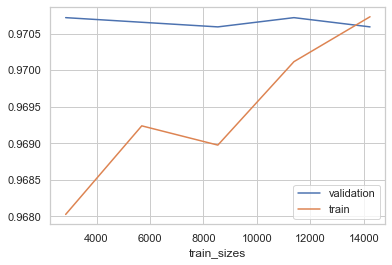

In [38]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [39]:
print(confusion_matrix(My_test, model2.predict(MX_test)))  
print(classification_report(My_test,model2.predict(MX_test)))

[[5115    5]
 [ 143    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       0.62      0.05      0.10       151

    accuracy                           0.97      5271
   macro avg       0.79      0.53      0.54      5271
weighted avg       0.96      0.97      0.96      5271



0.7927094112168874


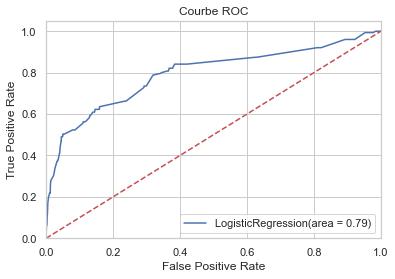

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model2.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='LogisticRegression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# NAIVES BAYES ALGORITHM

In [41]:
from sklearn.naive_bayes import GaussianNB  
param_grid={'var_smoothing': np.linspace(0.1,1,10)}
grid3=GridSearchCV( GaussianNB(),param_grid, cv=cv2)
grid3.fit(X1_train,y1_train)
print('best score',grid3.best_score_)
print('best score',grid3.best_params_)
model3=grid3.best_estimator_
print('best score',model3.score(MX_test,My_test))

best score 0.9707184957911228
best score {'var_smoothing': 0.5}
best score 0.9713526845000948


In [42]:
N, train_score, val_score=learning_curve(model3, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

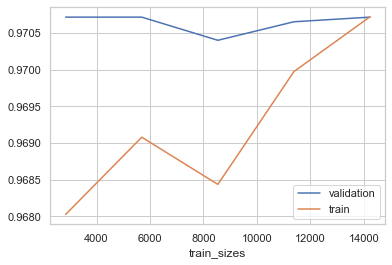

In [43]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [44]:
print(confusion_matrix(My_test, model3.predict(MX_test)))  
print(classification_report(My_test,model3.predict(MX_test)))

[[5120    0]
 [ 151    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       0.00      0.00      0.00       151

    accuracy                           0.97      5271
   macro avg       0.49      0.50      0.49      5271
weighted avg       0.94      0.97      0.96      5271



0.8248040407698676


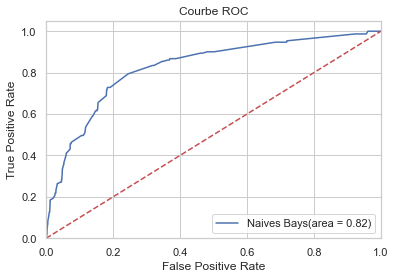

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model3.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Naives Bays(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM avec kernel

In [46]:
from sklearn.svm import SVC  
param_grid={'kernel':['rbf','linear','sigmoid']}
grid4=GridSearchCV(SVC(probability=True),param_grid, cv=cv2)
grid4.fit(X1_train,y1_train)
print('best score',grid4.best_score_)
print('best score',grid4.best_params_)
model4=grid4.best_estimator_
print('best score',model4.score(MX_test,My_test))

best score 0.9707184957911228
best score {'kernel': 'rbf'}
best score 0.9713526845000948


In [47]:
N, train_score, val_score=learning_curve(model4, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

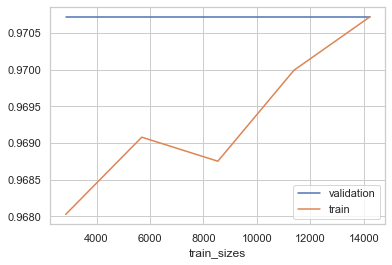

In [48]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [49]:
print(confusion_matrix(My_test, model4.predict(MX_test)))  
print(classification_report(My_test,model4.predict(MX_test)))

[[5120    0]
 [ 151    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       0.00      0.00      0.00       151

    accuracy                           0.97      5271
   macro avg       0.49      0.50      0.49      5271
weighted avg       0.94      0.97      0.96      5271



0.5154083454056292


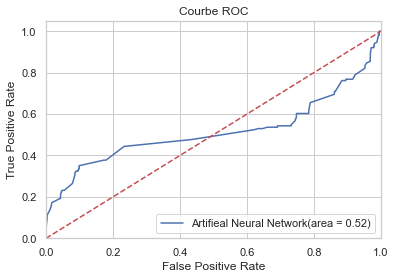

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model4.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Artifieal Neural Network

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import random
random.seed(1000)
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(MX_test)

In [52]:
param_grid={'hidden_layer_sizes':[(15,15,15),(14,13,15),(12,11,15)],'max_iter':[10,50,100, 200, 300,400]}

In [53]:
hidden_layer_sizes=(15,15,15)

In [55]:
param_grid={'max_iter':[10,50,100, 200, 300,400]}
grid5=GridSearchCV(MLPClassifier(hidden_layer_sizes=(14,14,14)),param_grid, cv=cv2)
grid5.fit(X1_train,y1_train)
print('best score',grid5.best_score_)
print('best score',grid5.best_params_)
model5=grid5.best_estimator_
print('best score',model5.score(X1_test,My_test))

best score 0.9707186157363316
best score {'max_iter': 300}
best score 0.9715424018212863


In [56]:
N, train_score, val_score=learning_curve(model5, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

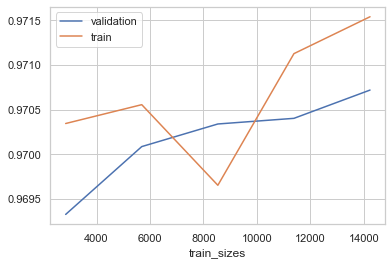

In [57]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [59]:
print(confusion_matrix(My_test, model5.predict(X1_test)))  
print(classification_report(My_test,model5.predict(X1_test)))

[[5115    5]
 [ 145    6]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       0.55      0.04      0.07       151

    accuracy                           0.97      5271
   macro avg       0.76      0.52      0.53      5271
weighted avg       0.96      0.97      0.96      5271



0.8351905266970199


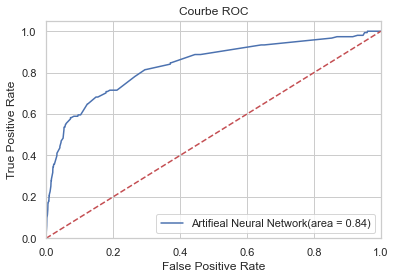

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model5.predict_proba(X1_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()